WeatherPy
   
Note:
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [275]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [83]:
#Confirm API key was accepted

#weather_api_key

Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [112]:
#Working with a loop
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set up lists to hold response info
nameofcity = []
lat1 = []
lng1 = []
maxT = []
hum = []
wind_spd = []
country = []
date = []
clouds = []
counter = 0
sets = 1

# Loop through the list of cities set by previous loop and perform a request for data on each []
print("-------Beginning of Data Retrieval--------")

for city in cities:
    city=city
    
    query_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {counter} of Set {sets} | {city}")
        nameofcity.append(response['name'])
        lat1.append(response['coord']['lat'])
        lng1.append(response['coord']['lon'])
        maxT.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        clouds.append(response['clouds']['all'])

    except: 
        print('City not found. Skipping...')
        lat1.append(np.nan)
        lng1.append(np.nan)
        maxT.append(np.nan)
        hum.append(np.nan)
        wind_spd.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        clouds.append(np.nan)
        
    counter = counter + 1
    if counter == 50:
        counter = 0
        sets = sets + 1

print("-----------------------")      
print("Data Retrieval Complete")
print("-----------------------") 

-------Beginning of Data Retrieval--------
Processing Record 0 of Set 1 | east london
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | kulhudhuffushi
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | aketi
Processing Record 9 of Set 1 | yuncheng
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 21 of Set 1 

Processing Record 34 of Set 4 | fort carson
Processing Record 35 of Set 4 | tautira
Processing Record 36 of Set 4 | lenoir
Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | fortuna
Processing Record 39 of Set 4 | guarapari
Processing Record 40 of Set 4 | dubenskiy
City not found. Skipping...
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | zaokskiy
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | kloulklubed
Processing Record 46 of Set 4 | lake shore
Processing Record 47 of Set 4 | tabuk
Processing Record 48 of Set 4 | emba
Processing Record 49 of Set 4 | goderich
Processing Record 0 of Set 5 | ierapetra
Processing Record 1 of Set 5 | lar
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | pingchen
City not found. Skipping...
Processing Record 4 of Set 5 | manadhoo
Processing Record 5 of Set 5 | diebougou
Processing Record 6 of Set 5 | llailla

Processing Record 24 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 25 of Set 8 | kabinda
Processing Record 26 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 8 | barawe
City not found. Skipping...
Processing Record 28 of Set 8 | melnikovo
Processing Record 29 of Set 8 | matadi
Processing Record 30 of Set 8 | conceicao da barra
Processing Record 31 of Set 8 | mahebourg
Processing Record 32 of Set 8 | richards bay
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | boueni
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | palm valley
Processing Record 37 of Set 8 | ishigaki
Processing Record 38 of Set 8 | morondava
Processing Record 39 of Set 8 | koumac
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | panzhihua
Processing Record 44 of Set 8 | samarai
Processing Record 45 of Set 8 | sawakin
Processi

Processing Record 9 of Set 12 | doha
Processing Record 10 of Set 12 | emerald
Processing Record 11 of Set 12 | marzuq
Processing Record 12 of Set 12 | kiruna
Processing Record 13 of Set 12 | tiznit
Processing Record 14 of Set 12 | gort
Processing Record 15 of Set 12 | mokshan
Processing Record 16 of Set 12 | ketchikan
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | yeppoon
Processing Record 19 of Set 12 | aguimes
Processing Record 20 of Set 12 | ellisras
Processing Record 21 of Set 12 | francisco sa
Processing Record 22 of Set 12 | san ramon
Processing Record 23 of Set 12 | hamilton
Processing Record 24 of Set 12 | birmitrapur
Processing Record 25 of Set 12 | acuna
City not found. Skipping...
Processing Record 26 of Set 12 | walvis bay
Processing Record 27 of Set 12 | namatanai
Processing Record 28 of Set 12 | coquimbo
Processing Record 29 of Set 12 | zabaykalsk
Processing Record 30 of Set 12 | vrdy
Processing Record 31 of Set 12 | riyadh
Processing Record 32 of

Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [122]:
#Create  a data frame from all lists

w_dict = {
    "City": cities,
    "Lat": lat1,
    "Lng": lng1,
    "Max Temp": maxT,
    "Humidity": hum,
    "Cloudiness": clouds,
    "Country": country,
    "Wind Speed": wind_spd,
    "Date": date
}

w_data = pd.DataFrame(weather_dict)
w_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,east london,-33.0153,27.9116,68.22,68.0,100.0,ZA,11.32,1.611537e+09
1,punta arenas,-53.1500,-70.9167,46.40,71.0,20.0,CL,16.11,1.611537e+09
2,samusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hermanus,-34.4187,19.2345,64.99,76.0,14.0,ZA,10.00,1.611537e+09
4,new norfolk,-42.7826,147.0587,96.01,19.0,93.0,AU,5.01,1.611537e+09


In [130]:
weather_drop = w_data.dropna()
weather_drop.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,east london,-33.0153,27.9116,68.22,68.0,100.0,ZA,11.32,1.611537e+09
1,punta arenas,-53.1500,-70.9167,46.40,71.0,20.0,CL,16.11,1.611537e+09
3,hermanus,-34.4187,19.2345,64.99,76.0,14.0,ZA,10.00,1.611537e+09
4,new norfolk,-42.7826,147.0587,96.01,19.0,93.0,AU,5.01,1.611537e+09
5,cidreira,-30.1811,-50.2056,76.35,82.0,34.0,BR,15.23,1.611537e+09


In [142]:
#Export the city data into a .csv.
weather_drop.to_csv(r'../output_data/city_weather_data.csv', index=False)

In [143]:
#Read into export csv file
file_path = "../output_data/city_weather_data.csv"
city_weather = pd.read_csv(file_path)
city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,east london,-33.0153,27.9116,68.22,68.0,100.0,ZA,11.32,1.611537e+09
1,punta arenas,-53.1500,-70.9167,46.40,71.0,20.0,CL,16.11,1.611537e+09
2,hermanus,-34.4187,19.2345,64.99,76.0,14.0,ZA,10.00,1.611537e+09
3,new norfolk,-42.7826,147.0587,96.01,19.0,93.0,AU,5.01,1.611537e+09
4,cidreira,-30.1811,-50.2056,76.35,82.0,34.0,BR,15.23,1.611537e+09
...,...,...,...,...,...,...,...,...,...
542,talara,-4.5772,-81.2719,73.65,81.0,100.0,PE,8.66,1.611537e+09
543,impfondo,1.6381,18.0667,71.82,88.0,100.0,CG,3.09,1.611537e+09
544,mudgee,-32.5943,149.5871,88.00,32.0,0.0,AU,12.66,1.611537e+09
545,santa cruz,-17.8000,-63.1667,75.20,83.0,99.0,BO,9.22,1.611537e+09


Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [148]:
#Check data to see if cities have humidity >100

# city_weather['Humidity'].max()
# city_weather['Humidity'].describe()
# city_weather['Humidity'] > 100.0

Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

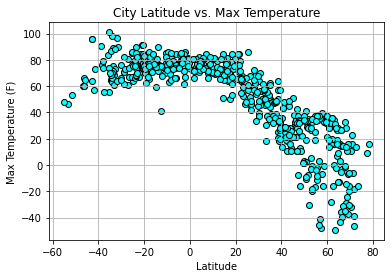

Analysis of cities latitude and the maximum temperature of those cities.


In [271]:
x_axis = city_weather['Lat']
y_axis = city_weather['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="cyan", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatVSMaxT.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and the maximum temperature of those cities.")

Latitude vs. Humidity Plot

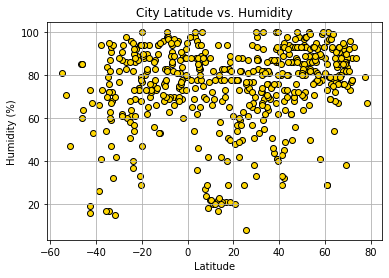

Analysis of cities latitude and percent humidity of those cities.


In [272]:
x_axis = city_weather['Lat']
y_axis = city_weather['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVSHumidity.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and percent humidity of those cities.")

Latitude vs. Cloudiness Plot

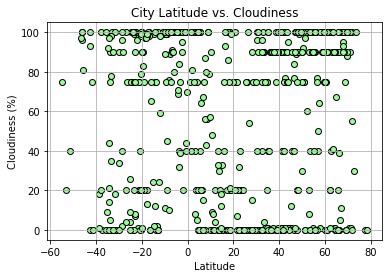

Analysis of cities latitude and the percent cloudiness of those cities.


In [273]:
x_axis = city_weather['Lat']
y_axis = city_weather['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", facecolors="palegreen", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVSCloudiness.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and the percent cloudiness of those cities.")

Latitude vs. Wind Speed Plot

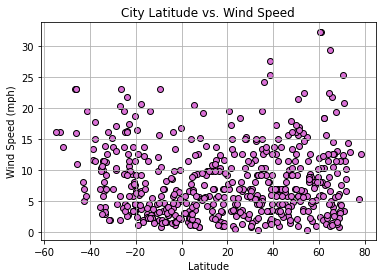

Analysis of cities latitude and wind speed of those cities.


In [274]:
x_axis = city_weather['Lat']
y_axis = city_weather['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orchid", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/LatVSWindSpeed.png")
plt.grid()
plt.show()
print("Analysis of cities latitude and wind speed of those cities.")

Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [181]:
#Need to filter data to include only northern hemisphere
#Latitude for northern hemisphere?
#0 degress at the equator and end at 90 degress at the North Poles
#Apply filter to include ALL columns within the city_weather data frame

nhem = city_weather.loc[city_weather['Lat'] >= 0, :]
nhem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
5,kulhudhuffushi,6.6221,73.0700,81.05,75.0,67.0,MV,9.35,1.611537e+09
7,aketi,2.7388,23.7833,74.55,54.0,100.0,CD,1.70,1.611537e+09
8,yuncheng,35.0231,110.9928,37.72,82.0,100.0,CN,13.35,1.611537e+09
10,jamestown,42.0970,-79.2353,23.00,68.0,90.0,US,6.91,1.611537e+09
14,bilibino,68.0546,166.4372,-28.68,82.0,95.0,RU,1.39,1.611537e+09
...,...,...,...,...,...,...,...,...,...
537,senno,59.5336,33.9167,33.01,93.0,100.0,RU,10.11,1.611537e+09
539,superior,46.7208,-92.1041,10.99,56.0,1.0,US,3.44,1.611537e+09
540,faya,18.3851,42.4509,53.60,50.0,0.0,SA,0.94,1.611537e+09
541,linjiang,41.8069,126.9078,28.90,89.0,0.0,CN,1.68,1.611537e+09


The r-squared is: 0.7250730311869333


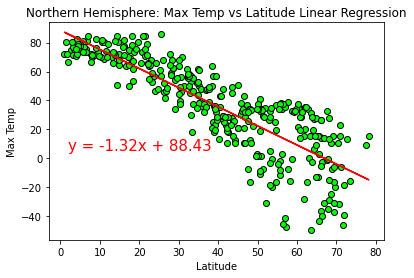

In [245]:
x_axis = nhem['Lat']
y_axis = nhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="lime", edgecolors="black")
plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(2,6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemMaxTvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [184]:
#Southern hemisphere anything >0 degrees lat
shem = city_weather.loc[city_weather['Lat'] < 0, :]
shem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,east london,-33.0153,27.9116,68.22,68.0,100.0,ZA,11.32,1.611537e+09
1,punta arenas,-53.1500,-70.9167,46.40,71.0,20.0,CL,16.11,1.611537e+09
2,hermanus,-34.4187,19.2345,64.99,76.0,14.0,ZA,10.00,1.611537e+09
3,new norfolk,-42.7826,147.0587,96.01,19.0,93.0,AU,5.01,1.611537e+09
4,cidreira,-30.1811,-50.2056,76.35,82.0,34.0,BR,15.23,1.611537e+09
...,...,...,...,...,...,...,...,...,...
538,padang,-0.9492,100.3543,75.20,88.0,40.0,ID,2.30,1.611537e+09
542,talara,-4.5772,-81.2719,73.65,81.0,100.0,PE,8.66,1.611537e+09
544,mudgee,-32.5943,149.5871,88.00,32.0,0.0,AU,12.66,1.611537e+09
545,santa cruz,-17.8000,-63.1667,75.20,83.0,99.0,BO,9.22,1.611537e+09


The r-squared is: 0.06609885054813663


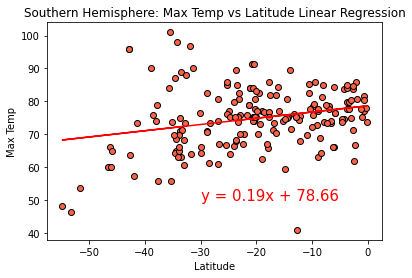

In [252]:
x_axis = shem['Lat']
y_axis = shem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="tomato", edgecolors="black")
plt.title("Southern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, xy=(-30, 50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemMaxTvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0979677863266544


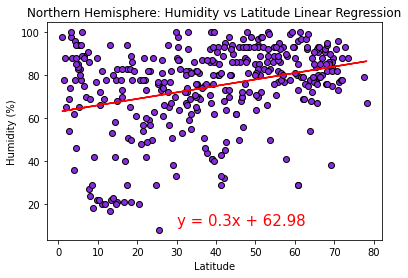

In [222]:
x_axis = nhem['Lat']
y_axis = nhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="blueviolet", edgecolors="black")
plt.title("Northern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemMHumidityvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11306418832914741


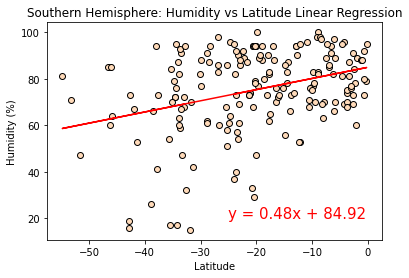

In [257]:
x_axis = shem['Lat']
y_axis = shem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="peachpuff", edgecolors="black")
plt.title("Southern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,xy=(-25, 20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemHumvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04606228718830488


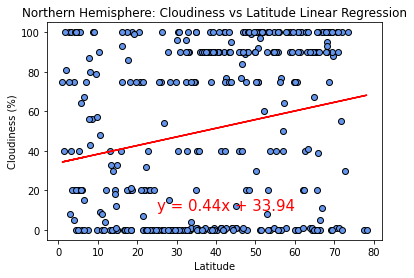

In [225]:
x_axis = nhem['Lat']
y_axis = nhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.title("Northern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemCloudsvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06830407265735244


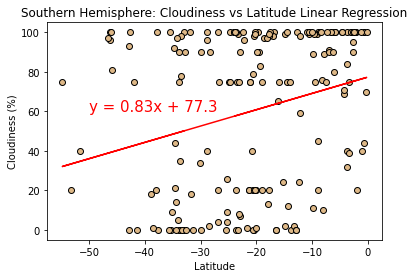

In [260]:
x_axis = shem['Lat']
y_axis = shem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="burlywood", edgecolors="black")
plt.title("Southern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,xy=(-50, 60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemCloudsvsLatLinearRegression.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027381441057195362


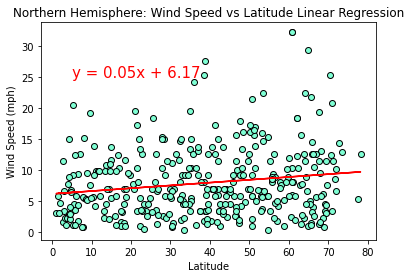

In [240]:
x_axis = nhem['Lat']
y_axis = nhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="aquamarine", edgecolors="black")
plt.title("Northern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NHemWindSpdvsLatLinearRegression.png")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17778309065140743


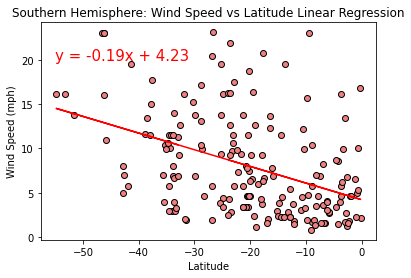

In [269]:
x_axis = shem['Lat']
y_axis = shem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black")
plt.title("Southern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,xy=(-55, 20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SHemWindSpdvsLatLinearRegression.png")
plt.show()